# Question 1

In [7]:
from automata.fa.dfa import DFA
from visual_automata.fa.dfa import VisualDFA
import string

In [8]:
lowercase = set(string.ascii_lowercase)
non_lowercase = {chr(i) for i in range(32, 127)} - lowercase  
all_symbols = lowercase.union(non_lowercase)

In [11]:
dfa = VisualDFA(
    states={"q0", "q1", "q2"},
    input_symbols=all_symbols,
    transitions={
        "q0": {c: "q1" for c in lowercase} | {c: "q2" for c in non_lowercase},
        "q1": {c: "q1" for c in lowercase} | {c: "q2" for c in non_lowercase},
        "q2": {c: "q2" for c in all_symbols}
      
    },
    initial_state="q0",
    final_states={"q1"},
)

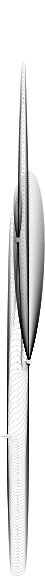

In [12]:
dfa = VisualDFA(dfa)
dfa.show_diagram()

In [14]:
dfa.input_check("Cats")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             C         q2
2                 q2             a         q2
3                 q2             t         q2
4                 q2             s         q2

In [19]:
dfa.input_check("cats")

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             c        *q1
2                *q1             a        *q1
3                *q1             t        *q1
4                *q1             s        *q1

In [21]:
pk = dfa.input_check("cats1")
type(pk)]]

pandas.core.frame.DataFrame

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             c        *q1
2                *q1             a        *q1
3                *q1             t        *q1
4                *q1             s        *q1
5                *q1             1         q2

In [25]:
with open("brown_nouns.txt", "r") as file:
    content = file.read()

type(content)

str

In [29]:
i = 0;
for s in content:
    if(i > 10):
        break
    print(dfa.input_check(s))
    i +=1

          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             i        *q1
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             n        *q1
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             v        *q1
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             e        *q1
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             s        *q1
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             t        *q1
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             i        *q1
          [Accepted]              

# Question 2

In [3]:
import graphviz

def create_complete_fst():
    dot = graphviz.Digraph('NounMorphologyFST', format='svg')
    # States
    dot.node('0', '0', shape='point', width='0.1')
    dot.node('1', '1')
    dot.node('2', '2') 
    dot.node('3', '3')
    dot.node('4', '4', shape='doublecircle')
    dot.node('5', '5', shape='doublecircle')
    
    # Transitions with input:output format
    # State 0 -> State 1: Read any valid noun
    dot.edge('0', '1', 'noun:noun')
    
    # State 1 -> States 2,3,4 based on ending
    dot.edge('1', '2', '[s,z,x,ch,sh]:[s,z,x,ch,sh]')  # E-insertion cases
    dot.edge('1', '3', '[consonant+y]:[consonant+y]')    # Y-replacement cases  
    dot.edge('1', '4', 'other:other')                    # Regular S-addition
    
    # For invalid words
    dot.edge('1', '5', 'invalid:Invalid Word')
    
    # State 2 -> State 4: Apply E-insertion rule
    dot.edge('2', '4', 'ε:es')
    
    # State 3 -> State 4: Apply Y-replacement rule  
    dot.edge('3', '4', 'y:ies')
    
    # Self-loops for generating morphological features
    dot.edge('4', '4', 'ε:+N+SG')  # Add singular features
    dot.edge('4', '4', 'ε:+N+PL')  # Add plural features
    
    return dot

fst = create_complete_fst()
fst.view()

<bound method File.view of <graphviz.dot.Digraph object at 0x0000011FBB31CCB0>>